<a href="https://colab.research.google.com/github/arijeetchoudhury100/fake_news_detection/blob/master/real_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arijeetchoudhury","key":"9839d199bf57c3d98b19f9b0de977309"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp -r kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 83% 34.0M/41.0M [00:01<00:00, 14.9MB/s]
100% 41.0M/41.0M [00:01<00:00, 23.6MB/s]


In [5]:
!ls

fake-and-real-news-dataset.zip	kaggle.json  sample_data


In [6]:
!unzip fake-and-real-news-dataset.zip
!ls

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                
fake-and-real-news-dataset.zip	Fake.csv  kaggle.json  sample_data  True.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load the dataset
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [10]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
#concatenate the two datasets
fake_news['label'] = 1
true_news['label'] = 0
news_data = pd.concat([fake_news,true_news])
print(len(news_data))
news_data.head()

44898


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


1    23481
0    21417
Name: label, dtype: int64


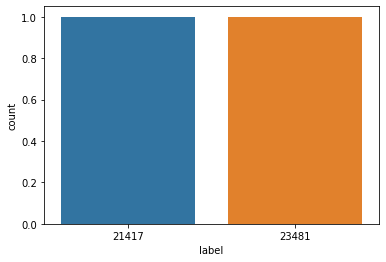

In [15]:
#check class distribution
print(news_data['label'].value_counts())
sns.countplot(news_data['label'].value_counts())

In [16]:
print(news_data['subject'].value_counts())

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


In [18]:
#drop the subjects and date column
news_data.drop('subject',axis=1,inplace=True)
news_data.drop('date',axis=1,inplace=True)
news_data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [19]:
#merge the title and text columns into one
news_data['news'] = news_data['title']+" "+news_data['text']
news_data.head()

,title,text,label,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...


In [20]:
news_data.drop('title',axis=1,inplace=True)
news_data.drop('text',axis=1,inplace=True)
news_data.head()

,label,news
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


In [0]:
#text cleaning
import re
import string
def remove_urls(text):
  return re.sub('https?:\S+','',text)

In [0]:
#remove urls from text
news_data['news'] = news_data['news'].apply(remove_urls)

In [0]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

In [0]:
#remove punctuation from text
news_data['news'] = news_data['news'].apply(remove_punctuation)

In [0]:
def remove_tags(text):
  return re.sub('<.*?>'," ",text)

In [0]:
#remove any tags present in the text
news_data['news'] = news_data['news'].apply(remove_tags)

In [0]:
def remove_numbers(text):
  return re.sub('[0-9]+','',text)

In [0]:
#remove numbers from the text
news_data['news'] = news_data['news'].apply(remove_numbers)

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
#print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
def remove_stopwords(text):
  cleaned = []
  for word in text.split():
    if word not in stops:
      cleaned.append(word)
  return " ".join(cleaned)

In [53]:
news_data['news'] = news_data['news'].apply(remove_stopwords)
news_data.head(10)

,label,news,no_url_text
0,1,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian C...,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke ...,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name ...,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis Just Called Out Donald Trump Dur...
5,1,Racist Alabama Cops Brutalize Black Boy While ...,Racist Alabama Cops Brutalize Black Boy While...
6,1,Fresh Off The Golf Course Trump Lashes Out At ...,"Fresh Off The Golf Course, Trump Lashes Out A..."
7,1,Trump Said Some INSANELY Racist Stuff Inside T...,Trump Said Some INSANELY Racist Stuff Inside ...
8,1,Former CIA Director Slams Trump Over UN Bullyi...,Former CIA Director Slams Trump Over UN Bully...
9,1,WATCH BrandNew ProTrump Ad Features So Much A ...,WATCH: Brand-New Pro-Trump Ad Features So Muc...
